In [1]:
import turicreate

# Task 1

Sketch summaries are techniques for computing summary statistics of data very quickly. In Turi Create has a method sketch which computes summary statistics. Using the training data, compute the sketch summary of the label olumn and interpret the results by running this command.

sketch = turicreate.Sketch(image_data['label'])

Then look at the sketch object to see the summary statistics.

For more information on Sketch, see:

https://apple.github.io/turicreate/docs/api/generated/turicreate.Sketch.html?highlight=sketch

What is the least common category in the training data?

Save this result to answer the quiz for this module.

In [2]:
image_data = turicreate.SFrame('image_train_data')

In [20]:
test_data = turicreate.SFrame('image_test_data')

In [3]:
sketch = turicreate.Sketch(image_data['label'])

In [12]:
sketch.frequency_count

<bound method Sketch.frequency_count of 
+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+

>

## Answer1: The least frequent is bird

# Task 2: Create category-specific image retrieval models

In most retrieval tasks, the data are unlabeled, thus you call these unsupervised learning problems. This image dataset has labels, so you will use them to create one model for each of the four image categories, dog, cat, automobile, and bird.

Follow these steps:

## 1
Split the training data into 4 different SFrame data structures. Each will contain data for one of the four categories image categories. (Hint: If you use a logical filter to select the rows where the label column equals ‘dog’, you can create an SFrame that contains only the data for images labeled ‘dog’.)

## 2
Similarly to the image retrieval notebook you downloaded, you will create a nearest neighbor model using deep features. You will create one such model for each category, using the corresponding subset of the training data. Call the model with the dog images dog_model, the one with the cat images cat_model, as so on.
You now have a nearest neighbors model, dog_model, that can find the nearest dog to any image you give the model. Another model, cat_model, that can find the nearest cat to any image you give it, and so on.

The following cat image is the first in the test data (image_test[0:1]):

## Using these models, answer the following questions.

What is the nearest cat-labeled image in the training data to the cat image that is the first image in the test data ?

What is the nearest dog-labeled image in the training data to the cat image that is the first image in the test data?

In [15]:
dogs = image_data[image_data['label'] == 'dog' ]
cats = image_data[image_data['label'] == 'cat' ]
automobiles = image_data[image_data['label'] == 'automobile' ]
birds = image_data[image_data['label'] == 'bird' ]

In [18]:
dogs_model = turicreate.nearest_neighbors.create(dogs,
                                               features = ['deep_features'],
                                               label = 'id')
cats_model = turicreate.nearest_neighbors.create(cats,
                                               features = ['deep_features'],
                                               label = 'id')
automobiles_model = turicreate.nearest_neighbors.create(automobiles,
                                               features = ['deep_features'],
                                               label = 'id')
birds_model = turicreate.nearest_neighbors.create(birds,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

In [21]:
catpru = test_data[0:1]

In [23]:
cats_model.query(catpru)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 23.429ms     |

| Done         |         | 100         | 81.727ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

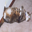

In [146]:
cat_image = image_data[image_data['id']==16289]
cat_image['image'].explore()

In [24]:
dogs_model.query(catpru)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.93ms       |

| Done         |         | 100         | 61.682ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

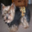

In [148]:
dog_image = image_data[image_data['id']==16976]
dog_image['image'].explore()

In [30]:
#def get_images_from_ids(query_result):
#    return image_data.filter_by(query_result['reference_label'],'id')

In [31]:
#cat_neighbors = get_images_from_ids(dogs_model.query(catpru))

In [32]:
#cat_neighbors['image'].explore()

# Task 3: Try a simple example of nearest-neighbors classification

When you queried the nearest neighbors model, the distance column in the Task 2 showed the computed distance between the input and each of the retrieved neighbors. In this task, you will use these distances for classification, using a nearest-neighbors classifier.

## 1
For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘cat’ in the training data (similar to what you did in the previous question).

## 2
For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘dog’ in the training data (similar to what you did in the previous question).
On average, is the first image in the test data closer to its five nearest neighbors in the ‘cat’ data or in the ‘dog’ data?

Save these results to answer the quiz for this module

In [33]:
catmean = cats_model.query(catpru)
dogmean = dogs_model.query(catpru)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.159ms     |

| Done         |         | 100         | 64.17ms      |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.763ms      |

| Done         |         | 100         | 53.973ms     |

+--------------+---------+-------------+--------------+

In [34]:
catmean

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [37]:
catmeannmb = catmean['distance'].mean()
dogmeannmb = dogmean['distance'].mean()
print('cat: ', catmeannmb,'dog: ', dogmeannmb)

cat:  36.15573070978294 dog:  37.77071136184156


# Task 4: Compute nearest neighbors accuracy

Just as you split the training data on label, you will now use the same procedure to split the test data on the cat, dog, automobile, and bird labels. Name the resulting SFrame data structures:

image_test_cat, image_test_dog, image_test_bird, image_test_automobile

Next you'll find nearest neighbors in the training set for each part of the test set

Thus far you queried the nearest neighbors models with a single image as the input, but you can actually query with a whole set of data. The query will find the nearest neighbors for each data point. Note that the input index is stored in the query_labelcolumn of the resulting SFrame.

Using this knowledge find the closest neighbor to the dog test data using each of the trained models. For example, this code:

dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

finds one neighbor (i.e., k=1) to the dog test images (image_test_dog) in the cat portion of the training data.

Next, follow the same procedure for the other dog combinations: dog-automobile, dog-bird, and dog-dog.

Create an SFrame with the distances from the dog test examples to the respective nearest neighbors in each class in the training data.

The distance column in dog_cat_neighbors contains the distance between each dog-labeled image in the test set and its nearest cat-labeled image in the training set. The question to answer is: How many of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird?

Next you will create an SFrame containing just these distances per data point. The goal is to create an SFrame called dog_distances with 4 columns:

dog_distances[‘dog-dog’] ---- storing dog_dog_neighbors[‘distance’]
dog_distances[‘dog-cat’] ---- storing dog_cat_neighbors[‘distance’]
dog_distances[‘dog-automobile’] ---- storing dog_automobile_neighbors[‘distance’]
dog_distances[‘dog-bird’] ---- storing dog_bird_neighbors[‘distance’]
Hint: You can create a new SFrame from the columns of other SFrame structures by creating a dictionary with the new columns, as shown in this example:

news_frame = turicreate.SFrame({'foo': others_frame['foo'],'bar': some_others_frame['bar']})

In [41]:
image_test_dog = test_data[test_data['label'] == 'dog' ]
image_test_cat = test_data[test_data['label'] == 'cat' ]
image_test_automobile = test_data[test_data['label'] == 'automobile' ]
image_test_bird = test_data[test_data['label'] == 'bird' ]


In [43]:
dog_cat_neighbors = cats_model.query(image_test_dog, k=1)
dog_bird_neighbors = birds_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobiles_model.query(image_test_dog, k=1)
dog_dog_neighbors = dogs_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 433.93ms     |

| Done         | 509000  | 100         | 452.107ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 119000  | 24.8954     | 439.155ms    |

| Done         | 478000  | 100         | 474.411ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 404.708ms    |

| Done         | 509000  | 100         | 505.034ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 458.882ms    |

| Done         | 509000  | 100         | 501.332ms    |

+--------------+---------+-------------+--------------+

In [49]:
#dog_cat_neighbors = cats_model.query(image_test_dog, k=1)
#dog_bird_neighbors = birds_model.query(image_test_dog, k=1)
#dog_automobile_neighbors = automobiles_model.query(image_test_dog, k=1)
#dog_dog_neighbors = dogs_model.query(image_test_dog, k=1)



In [50]:
dog_distances = turicreate.SFrame({'dog-dog': dog_dog_neighbors['distance'],'dog-cat': dog_cat_neighbors['distance'],'dog-bird': dog_bird_neighbors['distance'],'dog-automobile': dog_automobile_neighbors['distance']})

In [52]:
dog_distances.head()

dog-automobile,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


# Now that you have created dog_distances, you will use the apply method on this SFrame to iterate through each row and compute the number of dog test examples where the distance to the nearest dog image was lower than that to the other image classes.

## You will perform three steps:

## 1
Consider one row of dog_distances and call this variable row. You can access each distance by calling, for example, row['dog-cat'] which, in the previous table, will have value equal to 36.4196077068 for the first row. Create a function, def is_dog_correct(row):, that returns 1 if the value for row[‘dog-dog’] is lower than that of the other columns, and 0 otherwise. That is, returns 1 if this row is correctly classified by 1-nearest neighbors, and 0 if it is not.

## 2
Using the function is_dog_correct(row), you can check if one row is correctly classified. Next, you need to count how many rows are correctly classified. You could use a for loop to iterate through each row and apply the function is_dog_correct(row), but this method is extremely slow. An SFrame is not optimized for this type of operation. Instead, use the apply method to iterate the function is_dog_correct for each row.

## 3
Compute the number of correct predictions for dog. You can now call the function dog_distances.apply(is_dog_correct)which returns an SArray structure (a column of data) with a value 1 for every correct row and a value 0 for every incorrect one. You can call the sum method on the result to get the total number of correctly classified dog images in the test set.

## .
Using the work you did in this task, what is the accuracy of the 1-nearest neighbor classifier at classifying dog images from the test set?

In [137]:

def is_dog_correct(row):  
    if row['dog-dog'] <= min(row.values()):     
        return 1    
    else:        
        return 0


In [143]:
 dog_distances.apply(is_dog_correct).sum()

678